In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

###load tweet data as df
df=pd.read_csv('C:/research/siads591/Bitcoin_tweets.csv')


C:\Users\sunfe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [3]:
df.shape

(2573255, 13)

# Analysis 1.1 Tweets Data Overview

# 1.1.1 user location overview

In [4]:
##check the unique locations number in dataset
location=df.groupby(['user_location']).size().reset_index(name='counts')
len(location)

68738

In [95]:
location=df.groupby(['user_location']).size().reset_index(name='counts')
location=location.sort_values('counts',ascending=False)
location=location[:30]
import altair as alt
sort=location['user_location'].tolist()
alt.Chart(location).mark_bar().encode(
    x=alt.X('user_location:N',title=None,sort=sort,axis=alt.Axis(labelAngle=30)),
    y=alt.Y('counts:Q',title='User numbers')
).properties(width=600,height=180).properties(
 title={"text":'Location with Most Users'}
).configure_title(fontSize=18,anchor='middle',fontWeight='bold',font='Helvetica',subtitleFontWeight='bold',
)

alt.Chart(...)

# 1.1.2 Who posted most tweets

In [6]:
##check the unique locations number in dataset
user=df.groupby(['user_name']).size().reset_index(name='counts')
len(user)

414546

In [97]:
user=df.groupby(['user_name']).size().reset_index(name='counts')
user=user.sort_values('counts',ascending=False)
user=user[:30]
import altair as alt
sort=user['user_name'].tolist()
alt.Chart(user).mark_bar().encode(
    x=alt.X('user_name:N',title=None,sort=sort,axis=alt.Axis(labelAngle=30)),
    y=alt.Y('counts:Q',title='Tweets Posted')
).properties(width=600,height=180).properties(
 title={"text":'Who post most tweets?'}
).configure_title(fontSize=18,anchor='middle',fontWeight='bold',font='Helvetica',subtitleFontWeight='bold',
)

alt.Chart(...)

# 1.1.3 Who has most followers?

In [100]:
follower=df.groupby(['user_name'],as_index=False).agg({'user_followers': 'max'})
follower=follower.sort_values('user_followers',ascending=False)
follower=follower[:30]
import altair as alt
sort=follower['user_name'].tolist()
alt.Chart(follower).mark_bar().encode(
    x=alt.X('user_name:N',title=None,sort=sort,axis=alt.Axis(labelAngle=30)),
    y='user_followers:Q',
).properties(width=600,height=180).properties(
 title={"text":'Who has most followers?'}
).configure_title(fontSize=18,anchor='middle',fontWeight='bold',font='Helvetica',subtitleFontWeight='bold',
)



alt.Chart(...)

# 1.1.4 breakdown of verified and not verified users

In [9]:

verify=df.groupby(['user_name','user_verified']).size().reset_index(name='counts')
verify['user_verified']=verify['user_verified'].astype(str)
verify['user_verified']=verify['user_verified'].str.strip()
verify=verify.groupby(['user_verified']).size().reset_index(name='counts')
verify=verify.sort_values('counts',ascending=False)
verify

user_verified  counts
22                                              False  506357
24                                               True    3850
0                           #btc to the moon 🚀🚀 46059       1
14  DocumentingBTC: Buying a car with #bitcoin in ...       1
25                      saylor: #Bitcoin is a Ladder.       1
23  Official ESHOP Airdrop. If You Missed Meme Tok...       1
21  DocumentingBTC: You're never "late" to #bitcoi...       1
20  DocumentingBTC: Ukraine legalizes #bitcoin 🇺🇦\...       1
19  DocumentingBTC: The #bitcoin subreddit, r/Bitc...       1
18  DocumentingBTC: Put that daylight savings into...       1
17  DocumentingBTC: In 18 days, the 19,000,000th #...       1
16  DocumentingBTC: Galaxy Digital Founder &amp; C...       1
15  DocumentingBTC: Early Google executive and CEO...       1
13  DocumentingBTC: 7.9 billion people, only 21 mi...       1
1                           #btc to the moon 🚀🚀 77774       1
12  DocumentingBTC: #bitcoin at $30: "Am I too lat...       1
11  DocumentingBTC: #Bitcoin miners continue upgra...       1
10  DocumentingBTC: #Bitcoin "grew faster last yea...       1
9   DocumentingBTC: "I would take #bitcoin over go...       1
8   @pythonwealth Good Project 🎉🎉🎉🎉\n\n@nurull_pad...       1
7   @pufferswap Nice project\n\n@karnoto_hendrik \...       1
6   @krakenfx  #ETH #BTC  If you want to become po...       1
5          @iftikharpost the world is flat #bitcoin 💪       1
4   @bloodgoodBTC5\n\n#Bitcoin   \n\nShort term tr...       1
3   @airdropinspect Good and special project\n@anc...       1
2   @DogCakeFinance @DogCakeFinance Great project\...       1
26  🤯Mind-blowing 99.7% of all Bitcoin holders are...       1

# Analysis 1.2 Daily Tweets Data and Bitcoin Price/Volume

# 1.2.1 Daily tweets count and bitcoin price


In [ ]:
###df2 is the daily price/volume data
df2=pd.read_csv('C:/research/siads591/Binance_BTCUSDT_d.csv',header = 1)
def split(item):
    a=item.split(' ')[0]
    return a

df2['day']=df2['date'].apply(lambda x: split(x))
df2['day']=pd.to_datetime(df2['day'])
df2['daily_move']=(df2['close']/df2['open'])-1
df2['daily_volatility']=(df2['high']/df2['low'])-1
df2=df2.sort_values('day',ascending=True)
df2 = df2[df2['tradecount'].notna()]




In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
# create new columns by using shift column, which shift the price of next period up
df2['previous_volume'] = df2.tradecount.shift(periods=1) 
df2['day1_price'] = df2.close.shift(periods=-1) 
df2['day2_price'] = df2.close.shift(periods=-2) 
df2['day3_price'] = df2.close.shift(periods=-3) 
df2['day4_price'] = df2.close.shift(periods=-4) 
df2['day5_price'] = df2.close.shift(periods=-5) 
df2['day7_price'] = df2.close.shift(periods=-7) 
df2['day14_price'] = df2.close.shift(periods=-14) 
df2['day30_price'] = df2.close.shift(periods=-30) 

df2['day1_move'] =(df2['day1_price']/df2['close'])-1
df2['day2_move'] = (df2['day2_price']/df2['close'])-1
df2['day3_move'] = (df2['day3_price']/df2['close'])-1
df2['day4_move'] =(df2['day4_price']/df2['close'])-1
df2['day5_move'] = (df2['day5_price']/df2['close'])-1
df2['day7_move'] = (df2['day7_price']/df2['close'])-1
df2['day14_move'] = (df2['day14_price']/df2['close'])-1
df2['day30_move'] = (df2['day30_price']/df2['close'])-1

df2['day1_move_abs'] =df2['day1_move'].abs()
df2['day2_move_abs'] =df2['day2_move'].abs()
df2['day3_move_abs'] =df2['day3_move'].abs()
df2['day4_move_abs'] =df2['day4_move'].abs()
df2['day5_move_abs'] =df2['day5_move'].abs()
df2['day7_move_abs'] =df2['day7_move'].abs()
df2['day14_move_abs'] =df2['day14_move'].abs()
df2['day30_move_abs'] =df2['day30_move'].abs()


df2.head(20)


unix             date    symbol      open      high       low     close    Volume BTC  Volume USDT  tradecount        day  daily_move  daily_volatility  previous_volume  day1_price  day2_price  day3_price  day4_price  day5_price  day7_price  day14_price  day30_price  day1_move  day2_move  day3_move  day4_move  day5_move  day7_move  day14_move  day30_move  day1_move_abs  day2_move_abs  day3_move_abs  day4_move_abs  day5_move_abs  day7_move_abs  day14_move_abs  day30_move_abs
1574  1.510000e+12  2017/12/18 0:00  BTC/USDT  18860.04  19300.00  17029.98  18856.25  10624.633070  196339245.7     91956.0 2017-12-18   -0.000201          0.133296              NaN    17295.20    16488.98    15492.64    13326.61    13300.00    13699.34     13380.00     10988.79  -0.082787  -0.125543  -0.178382  -0.293252  -0.294664  -0.273485   -0.290421   -0.417234       0.082787       0.125543       0.178382       0.293252       0.294664       0.273485        0.290421        0.417234
1573  1.510000e+12  2017/12/19 0:00  BTC/USDT  18856.25  18950.00  16300.00  17295.20  13210.748220  232790625.9    116569.0 2017-12-19   -0.082787          0.162577          91956.0    16488.98    15492.64    13326.61    13300.00    13500.00    15689.01     14675.11     10961.97  -0.046615  -0.104223  -0.229462  -0.231001  -0.219437  -0.092869   -0.151492   -0.366184       0.046615       0.104223       0.229462       0.231001       0.219437       0.092869        0.151492        0.366184
1572  1.510000e+12  2017/12/20 0:00  BTC/USDT  17295.20  17720.35  14777.66  16488.98  13450.496690  221193892.5    129762.0 2017-12-20   -0.046615          0.199131         116569.0    15492.64    13326.61    13300.00    13500.00    13699.34    15459.99     14919.51     11474.98  -0.060425  -0.191787  -0.193401  -0.181271  -0.169182  -0.062405   -0.095183   -0.304082       0.060425       0.191787       0.193401       0.181271       0.169182       0.062405        0.095183        0.304082
1571  1.510000e+12  2017/12/21 0:00  BTC/USDT  16480.52  17309.50  14022.00  15492.64  20324.217300  320176825.3    117731.0 2017-12-21   -0.059942          0.234453         129762.0    13326.61    13300.00    13500.00    13699.34    15689.01    14182.11     15059.54     12799.94  -0.139810  -0.141528  -0.128618  -0.115752   0.012675  -0.084590   -0.027955   -0.173805       0.139810       0.141528       0.128618       0.115752       0.012675       0.084590        0.027955        0.173805
1570  1.510000e+12  2017/12/22 0:00  BTC/USDT  15514.03  15699.34  10961.00  13326.61  36076.271180  477509934.7    243261.0 2017-12-22   -0.140996          0.432291         117731.0    13300.00    13500.00    13699.34    15689.01    15459.99    14378.90     16960.39     11530.00  -0.001997   0.013011   0.027969   0.177269   0.160084   0.078962    0.272671   -0.134814       0.001997       0.013011       0.027969       0.177269       0.160084       0.078962        0.272671        0.134814
1569  1.510000e+12  2017/12/23 0:00  BTC/USDT  13326.61  14950.00  12978.18  13300.00  13141.538880  184759685.3    135005.0 2017-12-23   -0.001997          0.151933         243261.0    13500.00    13699.34    15689.01    15459.99    14182.11    12440.01     17069.79     10760.05   0.015038   0.030026   0.179625   0.162405   0.066324  -0.064661    0.283443   -0.190974       0.015038       0.030026       0.179625       0.162405       0.066324       0.064661        0.283443        0.190974
1568  1.510000e+12  2017/12/24 0:00  BTC/USDT  13300.00  13819.99  11640.00  13500.00  28557.534990  365709589.6    173557.0 2017-12-24    0.015038          0.187284         135005.0    13699.34    15689.01    15459.99    14182.11    14378.90    13716.36     16150.03     10799.18   0.014766   0.162149   0.145184   0.050527   0.065104   0.016027    0.196299   -0.200061       0.014766       0.162149       0.145184       0.050527       0.065104       0.016027        0.196299        0.200061
1567  1.510000e+12  2017/12/25 0:00  BTC/USDT  13500.00  14300.00  127

In [14]:
###transform format of the key "day" in tweet data df.
df['date']=df['date'].astype(str)
df['day']=df['date'].apply(lambda x: split(x))
filter1=df.groupby(['day']).size().reset_index(name='counts')
filter1=filter1[127:]  ###some 'day' values are not other random strings, need to filter those.
filter1=filter1['day'].tolist()


df_filter= df[~df['day'].isin(filter1)]
df_filter['day']=pd.to_datetime(df_filter['day'])



C:\Users\sunfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_filter_dailycount=df_filter.groupby(['day']).size().reset_index(name='counts')


In [17]:
# merge tweets data and price/volume data by key 'day'
dfdaily = pd.merge(df_filter_dailycount, df2,  how='left', left_on=['day'], right_on = ['day'])


In [19]:
dfdaily['day']=dfdaily['day'].astype(str)
dateindex=dfdaily.index[dfdaily['day'].str.contains( '2021-06-21')].tolist()
dfdaily1=dfdaily.loc[dateindex[-1]+1:]
dfdaily1

day  counts          unix             date    symbol      open      high       low     close    Volume BTC   Volume USDT  tradecount  daily_move  daily_volatility  previous_volume  day1_price  day2_price  day3_price  day4_price  day5_price  day7_price  day14_price  day30_price  day1_move  day2_move  day3_move  day4_move  day5_move  day7_move  day14_move  day30_move  day1_move_abs  day2_move_abs  day3_move_abs  day4_move_abs  day5_move_abs  day7_move_abs  day14_move_abs  day30_move_abs
38   2021-06-22   45840  1.620000e+12   2021/6/22 0:00  BTC/USDT  31614.12  33298.78  28805.00  32509.56  204208.17980  6.406159e+09   3113977.0    0.028324          0.156007        2688993.0    33678.07    34663.09    31584.45    32283.65    34700.34    35911.73     34220.01     32287.83   0.035944   0.066243  -0.028457  -0.006949   0.067389   0.104651    0.052614   -0.006820       0.035944       0.066243       0.028457       0.006949       0.067389       0.104651        0.052614        0.006820
39   2021-06-23   29358  1.620000e+12   2021/6/23 0:00  BTC/USDT  32509.56  34881.00  31683.00  33678.07  126966.10060  4.282250e+09   2026228.0    0.035944          0.100937        3113977.0    34663.09    31584.45    32283.65    34700.34    34494.89    35045.00     33862.12     33634.09   0.029248  -0.062166  -0.041404   0.030354   0.024254   0.040588    0.005465   -0.001306       0.029248       0.062166       0.041404       0.030354       0.024254       0.040588        0.005465        0.001306
40   2021-07-02   17789  1.630000e+12    2021/7/2 0:00  BTC/USDT  33502.33  33977.04  32699.00  33786.55   56172.18138  1.870193e+09   1176457.0    0.008484          0.039085        1240681.0    34669.13    35286.51    33690.14    34220.01    33862.12    33815.81     31383.87     39845.44   0.026122   0.044395  -0.002854   0.012829   0.002237   0.000866   -0.071114    0.179328       0.026122       0.044395       0.002854       0.012829       0.002237       0.000866        0.071114        0.179328
41   2021-07-03   25430  1.630000e+12    2021/7/3 0:00  BTC/USDT  33786.54  34945.61  33316.73  34669.13   43044.57864  1.478423e+09   1078278.0    0.026123          0.048891        1176457.0    35286.51    33690.14    34220.01    33862.12    32875.71    33502.87     31520.07     39147.82   0.017808  -0.028238  -0.012954  -0.023277  -0.051730  -0.033640   -0.090832    0.129184       0.017808       0.028238       0.012954       0.023277       0.051730       0.033640        0.090832        0.129184
42   2021-07-04   23087  1.630000e+12    2021/7/4 0:00  BTC/USDT  34669.12  35967.85  34357.15  35286.51   43703.47579  1.544458e+09   1164970.0    0.017808          0.046881        1078278.0    33690.14    34220.01    33862.12    32875.71    33815.81    34258.99     31778.56     38207.05  -0.045240  -0.030224  -0.040366  -0.068321  -0.041679  -0.029119   -0.099413    0.082766       0.045240       0.030224       0.040366       0.068321       0.041679       0.029119        0.099413        0.082766
43   2021-07-05   25981  1.630000e+12    2021/7/5 0:00  BTC/USDT  35288.13  35293.78  33125.55  33690.14   64123.87425  2.183406e+09   1109367.0   -0.045284          0.065455        1164970.0    34220.01    33862.12    32875.71    33815.81    33502.87    33086.63     30839.65     39723.18   0.015728   0.005105  -0.024174   0.003730  -0.005559  -0.017914   -0.084609    0.179074       0.015728       0.005105       0.024174       0.003730       0.005559       0.017914        0.084609        0.179074
44   2021-07-16    1110  1.630000e+12   2021/7/16 0:00  BTC/USDT  31874.49  32249.18  31020.00  31383.87   48499.86415  1.538343e+09   1067591.0   -0.015392          0.039625        1099367.0    31520.07    31778.56    30839.65    29790.35    32144.51    33634.09     42206.37     46973.82   0.004340   0.012576  -0.017341  -0.050775   0.024237   0.071700    0.344843    0.496750       0.004340       0.012576       0.017341       0.050775       0.024237       0.071700        0.344843        0.496

In [20]:
dfcount_move=dfdaily1[['counts','Volume USDT', 'tradecount','daily_volatility']]

In [21]:
dfdaily['counts'].describe()


count      127.000000
mean     20259.881890
std      16589.581119
min        217.000000
25%       4412.000000
50%      17789.000000
75%      33238.000000
max      71805.000000
Name: counts, dtype: float64

In [22]:
len(dfdaily)
dfcount_move

counts   Volume USDT  tradecount  daily_volatility
38    45840  6.406159e+09   3113977.0          0.156007
39    29358  4.282250e+09   2026228.0          0.100937
40    17789  1.870193e+09   1176457.0          0.039085
41    25430  1.478423e+09   1078278.0          0.048891
42    23087  1.544458e+09   1164970.0          0.046881
43    25981  2.183406e+09   1109367.0          0.065455
44     1110  1.538343e+09   1067591.0          0.039625
45    15204  1.072816e+09    883442.0          0.025401
46    26239  1.140964e+09    760979.0          0.042625
47    28931  1.470563e+09    846029.0          0.049052
48    30933  1.821231e+09   1062139.0          0.060970
49    38911  2.603141e+09   1415058.0          0.114487
50    30833  1.482764e+09   1000742.0          0.027859
51    43535  1.631947e+09   1394786.0          0.054055
52    32131  1.625046e+09   1196914.0          0.032899
53    11609  1.646936e+09   1245775.0          0.045697
54    27491  5.832475e+09   3330102.0          0.151800
55    13948  3.335658e+09   1938478.0          0.086843
56    15491  4.040889e+09   2631048.0          0.054885
57    19034  2.154191e+09   1428738.0          0.036735
58    38392  2.939834e+09   1797012.0          0.104493
59     1773  2.028793e+09   1220555.0          0.065614
60    12817  3.314528e+09   1913281.0          0.107608
61    15995  3.148022e+09   2223356.0          0.088789
62    13186  3.197407e+09   2258213.0          0.053093
63    33834  3.074925e+09   1857112.0          0.047364
64    53501  3.362870e+09   2130595.0          0.085910
65    13677  2.166461e+09   1849556.0          0.047268
66    30091  1.950754e+09   1580122.0          0.041149
67    32460  2.462128e+09   1655378.0          0.052427
68    35318  2.616340e+09   1781303.0          0.062737
69    38227  2.439673e+09   1656723.0          0.040647
70    34272  2.416320e+09   1774382.0          0.070691
71    39291  2.721132e+09   1950404.0          0.059198
72    10928  2.290966e+09   2069725.0          0.031833
73    10503  2.616721e+09   2143309.0          0.030003
74    26905  2.486079e+09   1692896.0          0.047479
75    47043  2.149442e+09   1559186.0          0.045368
76    39166  2.333900e+09   1532753.0          0.067088
77    23510  2.243699e+09   1569941.0          0.065728
78    23083  3.195091e+09   1629184.0          0.047646
79    63590  3.370864e+09   1755708.0          0.051593
80    33394  3.362879e+09   1823286.0          0.055427
81    42406  4.407758e+09   2181665.0          0.074835
82    54775  3.229378e+09   1555280.0          0.062207
83    39413  1.686122e+09    982103.0          0.036693
84    21919  3.688306e+09   1913083.0          0.060276
85    37411  3.677630e+09   1878275.0          0.080924
86    35805  2.706091e+09   1417344.0          0.046617
87    25929  2.218138e+09   1346081.0          0.039707
88    35590  1.943346e+09   1243074.0          0.030874
89    45799  1.556775e+09    965309.0          0.025154
90    19849  2.415537e+09   1327827.0          0.023402
91    39858  2.844287e+09   1479149.0          0.050944
92    36976  3.644824e+09   1960419.0          0.079713
93    54023  2.896190e+09   1560459.0          0.048921
94     6383  2.246374e+09   1432991.0          0.033992
95    37651  2.455659e+09   1604266.0          0.042086
96    57572  3.649354e+09   2138184.0          0.105607
97     6004  1.397525e+09    957390.0          0.058495
98    20439  2.015966e+09   1261780.0          0.055877
99     3770  1.873786e+09   1114074.0          0.044300
100   25088  1.428756e+09    910157.0          0.043573
101   11613  1.574804e+09   1015526.0          0.044369
102   42230  1.470906e+09   1023902.0          0.044099
103   42993  1.515945e+09   1036234.0          0.051730
104   30041  1.392000e+09    946938.0          0.041289
105    3673  1.327478e+09    924528.0          0.034531
106   22063  1.784801e+09   1098761.0          0.072785
107   35669  3.405502e+09   2092561.0          0.159692
108   71805  3.207531e+09   2

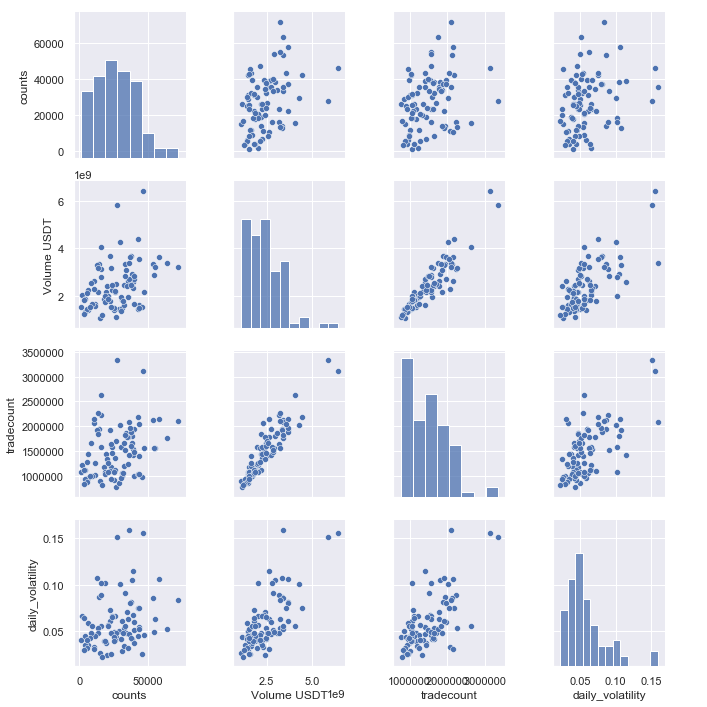

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(10, 10))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(dfcount_move,height=2.5)


In [24]:


a=alt.Chart(dfcount_move).mark_point(size=7).encode(
    x=alt.X('daily_volatility:Q'),
    y=alt.Y('counts:Q',title='daily tweets count'),  
).properties(width=150,height=150)

b=alt.Chart(dfcount_move).mark_point(size=7).encode(
    x=alt.X('Volume USDT:Q'),
    y=alt.Y('counts:Q',title=None),  
).properties(width=150,height=150)

a|b

alt.HConcatChart(...)

In [25]:
dfcount_move.corr()

counts  Volume USDT  tradecount  daily_volatility
counts            1.000000     0.372373    0.313589          0.275392
Volume USDT       0.372373     1.000000    0.921960          0.714169
tradecount        0.313589     0.921960    1.000000          0.632237
daily_volatility  0.275392     0.714169    0.632237          1.000000

In [26]:
dfdaily['day1']=dfdaily['day'].astype(str)
dfdaily['day1']=dfdaily['day1'].str[:10]
dfdaily.head()

day  counts          unix           date    symbol      open      high       low     close    Volume BTC   Volume USDT  tradecount  daily_move  daily_volatility  previous_volume  day1_price  day2_price  day3_price  day4_price  day5_price  day7_price  day14_price  day30_price  day1_move  day2_move  day3_move  day4_move  day5_move  day7_move  day14_move  day30_move  day1_move_abs  day2_move_abs  day3_move_abs  day4_move_abs  day5_move_abs  day7_move_abs  day14_move_abs  day30_move_abs        day1
0  2021-02-05    1694  1.610000e+12  2021/2/5 0:00  BTC/USDT  36936.65  38310.12  36570.00  38290.24   66681.33428  2.509278e+09   1853253.0    0.036646          0.047583        2211866.0    39186.94    38795.69    46374.87    46420.42    44807.58    47287.60     55906.00     50971.75   0.023419   0.013200   0.211141   0.212330   0.170209   0.234978    0.460059    0.331194       0.023419       0.013200       0.211141       0.212330       0.170209       0.234978        0.460059        0.331194  2021-02-05
1  2021-02-06    3278  1.610000e+12  2021/2/6 0:00  BTC/USDT  38289.32  40955.51  38215.94  39186.94   98757.31118  3.922095e+09   2291646.0    0.023443          0.071687        1853253.0    38795.69    46374.87    46420.42    44807.58    47969.51    47153.69     55841.19     52375.17  -0.009984   0.183427   0.184589   0.143431   0.224120   0.203301    0.424995    0.336547       0.009984       0.183427       0.184589       0.143431       0.224120       0.203301        0.424995        0.336547  2021-02-06
2  2021-02-07    3030  1.610000e+12  2021/2/7 0:00  BTC/USDT  39181.01  39700.00  37351.00  38795.69   84363.67976  3.256521e+09   1976357.0   -0.009834          0.062890        2291646.0    46374.87    46420.42    44807.58    47969.51    47287.60    48577.79     57408.57     54884.50   0.195361   0.196535   0.154963   0.236465   0.218888   0.252144    0.479767    0.414706       0.195361       0.196535       0.154963       0.236465       0.218888       0.252144        0.479767        0.414706  2021-02-07
3  2021-02-08    5647  1.610000e+12  2021/2/8 0:00  BTC/USDT  38795.69  46794.45  37988.89  46374.87  138597.53690  5.881537e+09   3230961.0    0.195361          0.231793        1976357.0    46420.42    44807.58    47969.51    47287.60    47153.69    47911.10     54087.67     55851.59   0.000982  -0.033796   0.034386   0.019682   0.016794   0.033126    0.166314    0.204350       0.000982       0.033796       0.034386       0.019682       0.016794       0.033126        0.166314        0.204350  2021-02-08
4  2021-02-09    4350  1.610000e+12  2021/2/9 0:00  BTC/USDT  46374.86  48142.19  44961.09  46420.42  115499.86170  5.386255e+09   3119034.0    0.000982          0.070752        3230961.0    44807.58    47969.51    47287.60    47153.69    48577.79    49133.45     48891.00     57773.16  -0.034744   0.033371   0.018681   0.015796   0.046475   0.058445    0.053222    0.244563       0.034744       0.033371       0.018681       0.015796       0.046475       0.058445        0.053222        0.244563  2021-02-09

In [28]:

dailycount=alt.Chart(dfdaily).mark_bar().encode(
    x=alt.X('day1:N',title=None,axis=alt.Axis(labelAngle=90)),
    y=alt.Y('counts:Q',title='daily tweets count'),  
).properties(width=1200,height=180)

price=alt.Chart(dfdaily).mark_line(color='orange').encode(
    x=alt.X('day1:N',title=None,axis=alt.Axis(labelAngle=70)),
#     y='close:Q',
    y=alt.Y('close:Q',axis=alt.Axis(title='daily bitcoin price',titleColor='orange'),scale=alt.Scale(domain=[20000, 70000]))
).properties(width=1200,height=180)

alt.layer(dailycount, price).resolve_scale(y='independent')

alt.LayerChart(...)

# 1.3 Hourly Tweets Data and Bitcoin Price/Volume

In [30]:
df_filter['hour']=pd.to_datetime(df_filter['date'])
df_filter['hour']=df_filter['hour'].dt.floor('H') ### use dt.floor function to change timestamp to "hour"


C:\Users\sunfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sunfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
hourdata=df_filter.groupby(['hour']).size().reset_index(name='counts')
hourdata['previous_hour'] = hourdata.hour.shift(periods=1) 
hourdata['previous_counts'] = hourdata.counts.shift(periods=1) 
hourdata['tweets_change'] =(hourdata['counts'] /hourdata['previous_counts'])-1

hourdata['date']=hourdata['hour'].astype(str)
dateindex=hourdata.index[hourdata['date'].str.contains( '2021-06-21')].tolist()
hourdata=hourdata.loc[dateindex[-1]+1:]
hourdata['diff']=(hourdata['hour']-hourdata['previous_hour']).apply(lambda x: (x.seconds)/3600)
hourdata=hourdata[hourdata['diff']==1]
hourdata.reset_index(drop=True)

hour  counts       previous_hour  previous_counts  tweets_change                 date  diff
0    2021-06-22 00:00:00    1663 2021-06-21 23:00:00           1671.0      -0.004788  2021-06-22 00:00:00   1.0
1    2021-06-22 01:00:00    1732 2021-06-22 00:00:00           1663.0       0.041491  2021-06-22 01:00:00   1.0
2    2021-06-22 02:00:00    1434 2021-06-22 01:00:00           1732.0      -0.172055  2021-06-22 02:00:00   1.0
3    2021-06-22 03:00:00    1320 2021-06-22 02:00:00           1434.0      -0.079498  2021-06-22 03:00:00   1.0
4    2021-06-22 04:00:00    1249 2021-06-22 03:00:00           1320.0      -0.053788  2021-06-22 04:00:00   1.0
5    2021-06-22 05:00:00    1172 2021-06-22 04:00:00           1249.0      -0.061649  2021-06-22 05:00:00   1.0
6    2021-06-22 06:00:00    1254 2021-06-22 05:00:00           1172.0       0.069966  2021-06-22 06:00:00   1.0
7    2021-06-22 07:00:00    1403 2021-06-22 06:00:00           1254.0       0.118820  2021-06-22 07:00:00   1.0
8    2021-06-22 08:00:00    1381 2021-06-22 07:00:00           1403.0      -0.015681  2021-06-22 08:00:00   1.0
9    2021-06-22 09:00:00    1571 2021-06-22 08:00:00           1381.0       0.137581  2021-06-22 09:00:00   1.0
10   2021-06-22 10:00:00    1653 2021-06-22 09:00:00           1571.0       0.052196  2021-06-22 10:00:00   1.0
11   2021-06-22 11:00:00    1648 2021-06-22 10:00:00           1653.0      -0.003025  2021-06-22 11:00:00   1.0
12   2021-06-22 12:00:00    3608 2021-06-22 11:00:00           1648.0       1.189320  2021-06-22 12:00:00   1.0
13   2021-06-22 13:00:00    3694 2021-06-22 12:00:00           3608.0       0.023836  2021-06-22 13:00:00   1.0
14   2021-06-22 14:00:00    3307 2021-06-22 13:00:00           3694.0      -0.104764  2021-06-22 14:00:00   1.0
15   2021-06-22 15:00:00    3115 2021-06-22 14:00:00           3307.0      -0.058059  2021-06-22 15:00:00   1.0
16   2021-06-22 16:00:00    2908 2021-06-22 15:00:00           3115.0      -0.066453  2021-06-22 16:00:00   1.0
17   2021-06-22 17:00:00    2150 2021-06-22 16:00:00           2908.0      -0.260660  2021-06-22 17:00:00   1.0
18   2021-06-22 18:00:00    2137 2021-06-22 17:00:00           2150.0      -0.006047  2021-06-22 18:00:00   1.0
19   2021-06-22 19:00:00    1792 2021-06-22 18:00:00           2137.0      -0.161441  2021-06-22 19:00:00   1.0
20   2021-06-22 20:00:00    1947 2021-06-22 19:00:00           1792.0       0.086496  2021-06-22 20:00:00   1.0
21   2021-06-22 21:00:00    1411 2021-06-22 20:00:00           1947.0      -0.275295  2021-06-22 21:00:00   1.0
22   2021-06-22 22:00:00    1194 2021-06-22 21:00:00           1411.0      -0.153792  2021-06-22 22:00:00   1.0
23   2021-06-22 23:00:00    1097 2021-06-22 22:00:00           1194.0      -0.081240  2021-06-22 23:00:00   1.0
24   2021-06-23 00:00:00    1269 2021-06-22 23:00:00           1097.0       0.156791  2021-06-23 00:00:00   1.0
25   2021-06-23 01:00:00    1380 2021-06-23 00:00:00           1269.0       0.087470  2021-06-23 01:00:00   1.0
26   2021-06-23 02:00:00    1270 2021-06-23 01:00:00           1380.0      -0.079710  2021-06-23 02:00:00   1.0
27   2021-06-23 03:00:00    1124 2021-06-23 02:00:00           1270.0      -0.114961  2021-06-23 03:00:00   1.0
28   2021-06-23 04:00:00    1077 2021-06-23 03:00:00           1124.0      -0.041815  2021-06-23 04:00:00   1.0
29   2021-06-23 05:00:00    1105 2021-06-23 04:00:00           1077.0       0.025998  2021-06-23 05:00:00   1.0
30   2021-06-23 06:00:00    1206 2021-06-23 05:00:00           1105.0       0.091403  2021-06-23 06:00:00   1.0
31   2021-06-23 07:00:00    1313 2021-06-23 06:00:00           1206.0       0.088723  2021-06-23 07:00:00   1.0
32   2021-06-23 08:00:00    1293 2021-06-23 07:00:00           1313.0      -0.015232  2021-06-23 08:00:00   1.0
33   2021-06-23 09:00:00    1229 2021-06-23 08:00:00           1293.0      -0.049497  2021-06-23 09:00:00   1.0
34   2021-06-23 10:00:00    1253 2021-06-23 09:00:00           1229.0       0.019528  2021-06-23 10:

In [32]:
df3=pd.read_csv('C:/research/siads591/Binance_BTCUSDT_1h.csv',header = 1) ###import hourly price/volume data as df3
df3.shape

(40632, 10)

In [33]:
df3['date']=df3['date'].astype(str)
###delete 2017,2018,2019,2020 data
df3=df3[~df3['date'].str.contains("2017")]
df3=df3[~df3['date'].str.contains("2018")]
df3=df3[~df3['date'].str.contains("2019")]
df3=df3[~df3['date'].str.contains("2020")]

df3['hour']=pd.to_datetime(df3['date'])
df3=df3.sort_values('hour',ascending=True)

df3=df3.reset_index(drop=True)


In [34]:
df3['h1_price'] = df3.close.shift(periods=-1) 
df3['h2_price'] = df3.close.shift(periods=-2) 
df3['h3_price'] = df3.close.shift(periods=-3) 

df3['h1_volume'] = df3.tradecount.shift(periods=-1) 
df3['h2_volume'] = df3.tradecount.shift(periods=-2) 
df3['h3_volume'] = df3.tradecount.shift(periods=-3) 


df3['h1_move'] =(df3['h1_price']/df3['close'])-1
df3['h2_move'] =(df3['h2_price']/df3['close'])-1
df3['h3_move'] =(df3['h3_price']/df3['close'])-1

df3['h1_volume_change'] =(df3['h1_volume']/df3['tradecount'])-1
df3['h2_volume_change'] =(df3['h2_volume']/df3['tradecount'])-1
df3['h3_volume_change'] =(df3['h3_volume']/df3['tradecount'])-1

dateindex=df3.index[df3['date'].str.contains( '2021-06-21')].tolist()
df3_1=df3.loc[dateindex[-1]+1:]


In [35]:
###merge tweet hour data and df3-hourly price/volume data
dfhourly= pd.merge(hourdata, df3_1,  how='left', left_on=['hour'], right_on = ['hour'])
dfhourly=dfhourly[['counts','tweets_change','h1_move', 'h2_move', 'h3_move', 'h1_volume_change', 'h2_volume_change', 'h3_volume_change']]
# dfhourly['h1_move_abs']=dfhourly['h1_move'].abs()
# dfhourly['h2_move_abs']=dfhourly['h1_move'].abs()
# dfhourly['h3_move_abs']=dfhourly['h1_move'].abs()

In [36]:
hourdata['tweets_change'].describe()

count    1654.000000
mean        0.152830
std         2.718667
min        -0.867091
25%        -0.091103
50%        -0.004164
75%         0.093976
max        99.625000
Name: tweets_change, dtype: float64

In [37]:
dfhourly.corr()

counts  tweets_change   h1_move   h2_move   h3_move  h1_volume_change  h2_volume_change  h3_volume_change
counts            1.000000       0.006964  0.003595  0.008279  0.010387         -0.078652         -0.103773         -0.127901
tweets_change     0.006964       1.000000 -0.000836  0.001308 -0.003759         -0.011500         -0.014710         -0.011814
h1_move           0.003595      -0.000836  1.000000  0.726418  0.595423         -0.029830          0.004789          0.011255
h2_move           0.008279       0.001308  0.726418  1.000000  0.833651         -0.007840          0.013314          0.048446
h3_move           0.010387      -0.003759  0.595423  0.833651  1.000000          0.023965          0.052276          0.092789
h1_volume_change -0.078652      -0.011500 -0.029830 -0.007840  0.023965          1.000000          0.509135          0.330164
h2_volume_change -0.103773      -0.014710  0.004789  0.013314  0.052276          0.509135          1.000000          0.598528
h3_volume_change -0.127901      -0.011814  0.011255  0.048446  0.092789          0.330164          0.598528          1.000000

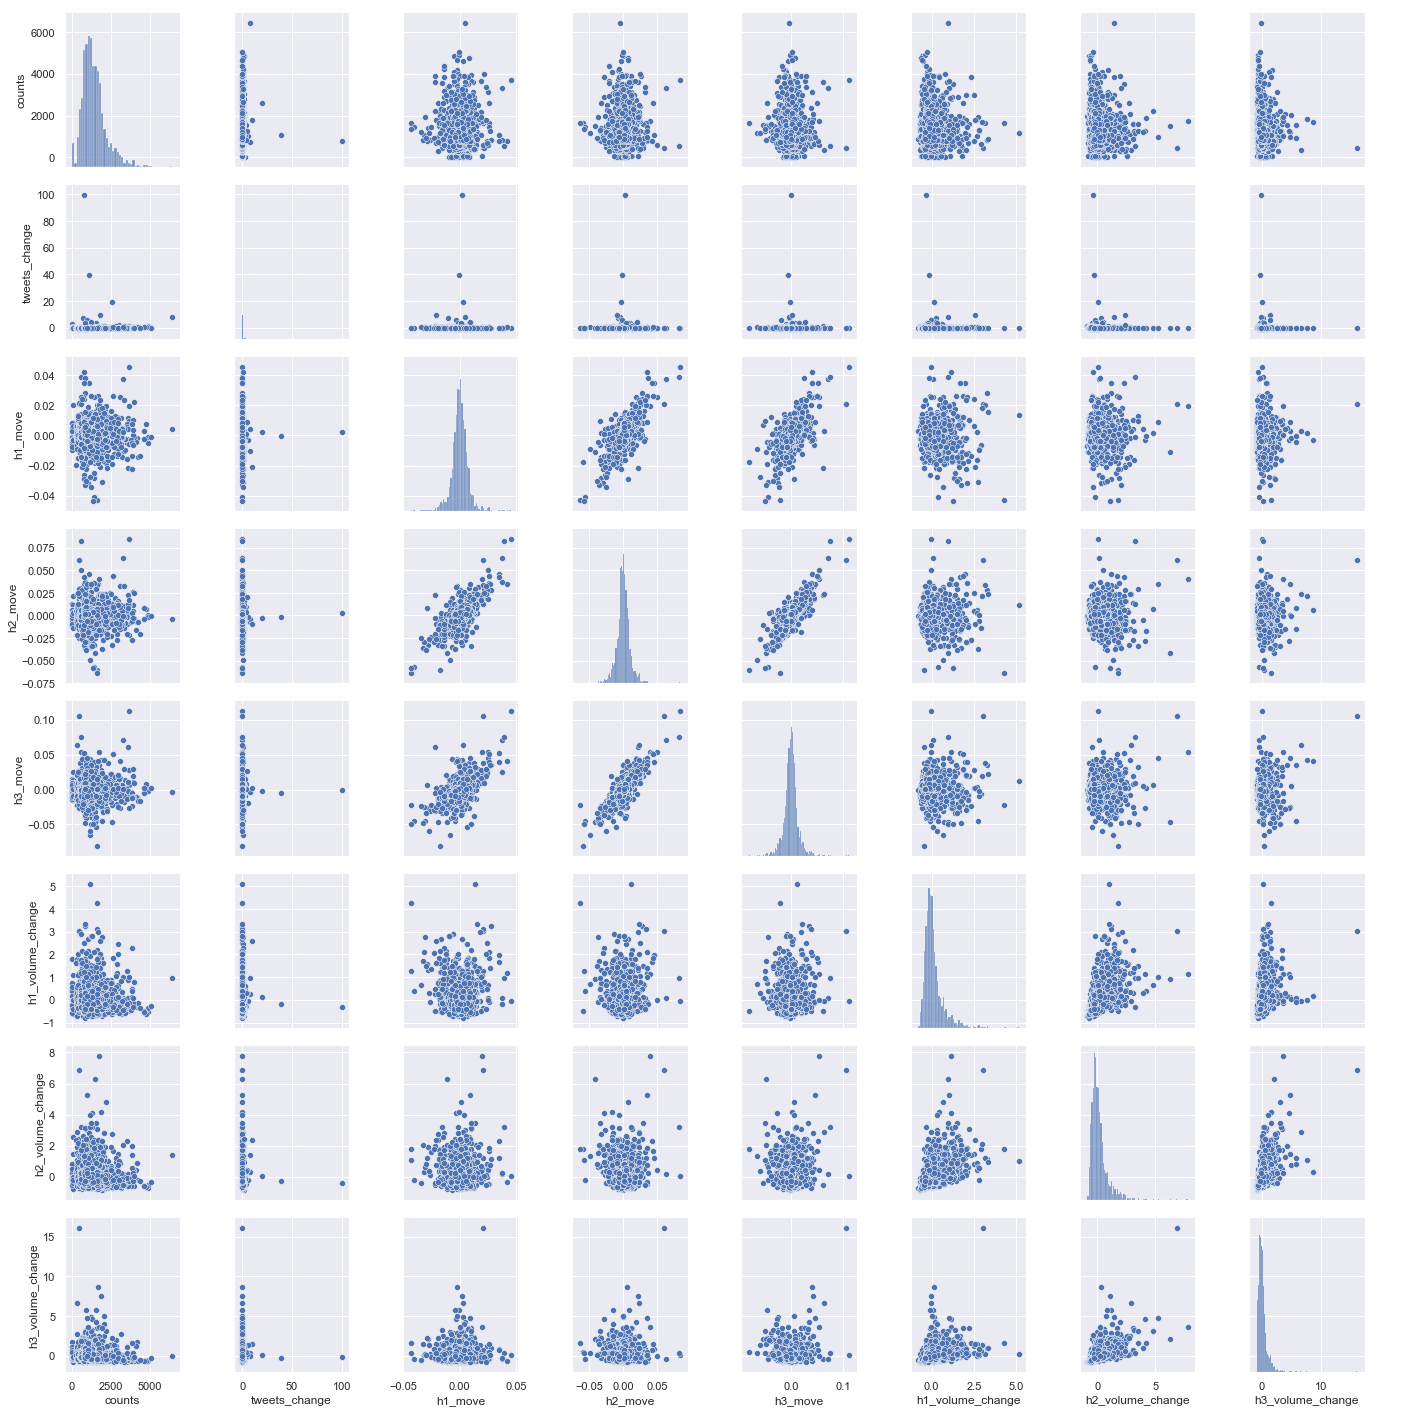

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(dfhourly,height=2.5)



# 1.4 Most Influential Twitter Users Analysis

In [39]:
dfuser= pd.merge(df_filter, df3,  how='left', left_on=['hour'], right_on = ['hour'])

In [40]:
bestworst=dfuser.groupby(['user_name'],as_index=False).agg({'h1_move': 'sum','h2_move':'sum','h3_move':'sum'})
best=bestworst.sort_values('h1_move',ascending=False)
best.reset_index(drop=True)

user_name   h1_move    h2_move    h3_move
0                                               Bitswings  8.677698   5.819485  10.093146
1                                      Whale Transactions  5.835702  10.382505  13.089298
2                                             Crunchyroll  4.634997   3.950360   0.473662
3                                             gongzige618  4.282630   6.168039   6.383287
4                                            CryptoSquawk  3.893946   8.206699  11.163785
5                                   #Help Me Pay My Bills  3.848455   9.049976  13.786003
6                                            BitcoinAgile  3.712609   7.884153  10.555386
7                                      DYOR.net Dev & Bot  3.647014   7.212537  10.972239
8                                          brettmurphynet  3.396798   6.473065  10.911721
9                                               Hamidreza  3.342121   3.722168   4.361679
10                                                Ram Raj  3.083526   3.881123   2.304556
11                                          Mehmet pekşen  3.080101   4.951790   2.833763
12                                              Tom Hanks  3.029128   1.942465  -1.458882
13                                                 Mohsen  2.888944   2.248656   2.331348
14                                           Crypto Elena  2.880632   4.445872   4.856854
15                                          The future...  2.789658   6.298929   8.840774
16                                                sai.bit  2.783571   2.280757  -0.511796
17                                                 Amin.m  2.765364  -0.166639  -2.027440
18                                            BEARWHALE 🐳  2.683082   4.094402   2.726516
19                                           ChinettePunk  2.682497   4.273230   5.261744
20                                                mehrzad  2.607052   3.401306   1.771338
21                                        Nurullah Keklik  2.587361   2.849177   2.511427
22                                          Crypto Volume  2.547425   4.424029   1.322120
23                                               Khophoza  2.397937   3.063465   3.762708
24                                             iraj.abadi  2.271051   1.871945   0.403114
25                                         Crypto Council  2.254319  -1.570748  -4.214311
26                                          imkaushal2603  2.223036   3.605131   2.711014
27                                        cecille manzano  2.184758   1.242224   0.764292
28                                             Heera Zane  2.173003   3.934061   3.588221
29                                   Мусалреза 1 шамаьади  2.120919   1.234003   2.557336
30                                        tictoknextblock  2.053967   4.247957   5.780317
31                                                   ELSA  2.052988   4.738918   4.951597
32                                                  ARIAN  2.041798  -0.426860   2.716134
33                                               Hoba Bot  2.030494   4.136947   6.539424
34                                              chanel.c/  1.991218   2.709340   2.495956
35                                             Kimmy Rein  1.966807   4.623072   3.451624
36                                            Amir Meshel  1.931885   2.461589   3.222922
37                                            Honour Rose  1.923660   0.102935   1.523516
38                                                     XO  1.875114   3.106214   3.917260
39                             Mohsen.au (feg is my life)  1.792984   1.922234   1.189409
40                                                milladi  1.738207   1.369080   1.740486
41                                           Free Bitcoin  1.734895   7.027747   9.166377
42                                          WhaleTrades 🐳  1.709652   3.818156   2.513971
43                                                  Mehdi  1.481928   1.277387   0.57198

In [41]:
worst=bestworst.sort_values('h1_move',ascending=True)
worst.reset_index(drop=True)

user_name   h1_move    h2_move    h3_move
0                                             ali barrera -7.284586  -9.071395  -7.992865
1                                         ExchangeWhales🐋 -6.952038 -12.878175 -23.452710
2                                                  Sophie -6.295206  -0.797153  -1.842840
3                                           Volume Alerts -5.636211 -12.354409 -17.420003
4                                     Bitcoin_Whale_Alert -5.488477  -6.308241  -7.522121
5                                                     MTN -4.990247 -14.586761 -17.215244
6                                                    Madi -4.913926  -6.397078  -8.333703
7                                            Crypto Jenny -4.871559 -12.588837 -14.816901
8                                            Whale Alerts -4.300943  -7.021638 -11.668585
9                       Cryptocurrency prices (real-time) -4.127950  -7.866543 -11.834097
10                                      Rhanyery BabyDOGE -3.957742  -3.773866  -5.533526
11                                                 yashar -3.744643   0.433183   1.518890
12                                            Koemata Nai -3.322297  -3.577785  -5.260765
13                                            Crypto king -3.103796  -6.124892 -10.324916
14                                               DYOR.net -2.950856  -5.836327  -8.898897
15                                      Now on Bitcoin 🇬🇧 -2.861608  -1.457708  -2.031344
16                                            Crypto Life -2.808726  -8.771367  -4.868759
17                                                     MK -2.761081  -4.379979  -6.141745
18                                          crypto nanomi -2.656076  -5.802720  -5.430359
19                                            cryptostar_ -2.649313  -4.083545  -5.855707
20             thinkmoon.io | Latest crypto trends & news -2.632804  -6.339491  -9.459353
21                                                COINRBI -2.577811  -4.058466  -5.956157
22                                         Crypto Bitlord -2.369614  -1.431082  -0.520229
23                              WSB CFO _ Dogecoinwizzard -2.348552  -4.072966  -4.177842
24                                           Crypto Vihat -2.226399  -2.654555  -1.637135
25                                   Bingo Crypto Scanner -2.145558  -0.756461  -0.910202
26                                                minis40 -2.093449  -4.250537  -6.514659
27                                      Everything crypto -2.035900  -3.991409  -5.966127
28                                                 ᵋߠΣᏚᏞ₳ -1.929655   0.229116   0.575611
29                                             coinmstsmo -1.764200  -2.608187  -3.168731
30                                          behrouz joon2 -1.752500  -1.316525   0.478595
31                                           Crypto Bittu -1.750886  -2.570206  -1.383566
32                                         Crypto Freakie -1.750078   0.126224  -0.984484
33                                   Dr. Crypto Analyst ⚡ -1.734166  -2.715641  -4.156145
34                                            abbas khoda -1.730081  -1.383609  -0.221364
35                                                Dani VB -1.638042  -1.075652  -1.874327
36                                Bitcoin Price Alert Bot -1.585649  -1.950647  -2.253402
37                     ClankApp - Crypto Whales Tracker 🐳 -1.579215  -4.310546  -5.457010
38                                              BlockScan -1.570323  -0.445235   2.290694
39                                         Onesmas Riungu -1.515705  -1.693933  -1.895631
40                                        #All Bills Paid -1.505909  -3.087502  -5.110985
41                                      GoldSilverBitcoin -1.500461  -2.256448  -1.535911
42                                         BitcoinTracker -1.495324  -3.175993  -4.099731
43                           South Africa Rants and Raves -1.491229  -1.031669  -0.82680

In [42]:
mtn=df_filter[df_filter['user_name']=='MTN']

In [43]:

alt.Chart(mtn).mark_bar().encode(
    alt.X("hour:N"),
    y='count()',
)

alt.Chart(...)

# Best User 'Whale Transactions' Analysis

In [44]:
wt=dfuser[dfuser['user_name']=='Whale Transactions']

In [45]:
pd.set_option('display.max_colwidth', 100)

wt[['hour','text']]

hour                                                                                                 text
46778   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (801.00118432 BTC) TRANSACTION AT HASH a6b58c3d2d8d09af19ee288ea7d4...
46810   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (300.71722144 BTC) TRANSACTION AT HASH d06170173842dc7d890d5eb2d6c7...
46826   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (647.2784889 BTC) TRANSACTION AT HASH 764816064d1cbaf7736aa8586aca9...
46832   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (393.69025557 BTC) TRANSACTION AT HASH 635f25f89dfe664f3fb91b4bc090...
46847   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1253.58289534 BTC) TRANSACTION AT HASH f3b6ab3d00e8fd4331b113c43cf...
46857   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (554.93110637 BTC) TRANSACTION AT HASH 390473e45da4c749017b6c02bd8a...
46866   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (700.00056885 BTC) TRANSACTION AT HASH d6dcf74faee5e3aac4100c4ccf21...
46874   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (261.865985 BTC) TRANSACTION AT HASH 533ec2e40b05959d581ba683a8e0ed...
46877   2021-03-12 10:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (815.22465347 BTC) TRANSACTION AT HASH 9f5f60427693a1091562ca1e910d...
46902   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (800.00592333 BTC) TRANSACTION AT HASH 03d6a272c68a454bd16c66107b11...
46909   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (353.94918529 BTC) TRANSACTION AT HASH 9e0a97853a4ae49aa442501d9f72...
46958   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (525.005 BTC) TRANSACTION AT HASH 2e39c48469e6984b9ed87931741accf27...
46988   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (445.63383293 BTC) TRANSACTION AT HASH 0a4349717b2eddfa8b86a66e47a2...
46992   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (645.63396251 BTC) TRANSACTION AT HASH 60918a269846122b110c278cadc8...
47059   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (3109.82991247 BTC) TRANSACTION AT HASH fb8a75bec74a42e73c0ebc26644...
47068   2021-03-12 09:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (500 BTC) TRANSACTION AT HASH d86c878d8f292eddbea1228e8cc03fb9ad004...
47286   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (350.5740083 BTC) TRANSACTION AT HASH 6c59892a8fd53c32b876f744b2472...
47313   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (499.99985128 BTC) TRANSACTION AT HASH 398f2df08262898da2a3a0501e40...
47332   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (970.63422125 BTC) TRANSACTION AT HASH 0e98f57edac5e93b910f68cd4a6c...
47334   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1070.63435041 BTC) TRANSACTION AT HASH 3fbc0024517b85b74638f48489d...
47352   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1185.63447957 BTC) TRANSACTION AT HASH 39431a0fc01f50331a8c4285bf9...
47357   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1300.63460873 BTC) TRANSACTION AT HASH 33ed8f63e5100ad07f7617cd7d1...
47385   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1385.63473789 BTC) TRANSACTION AT HASH b59023f1943d2c71db4a792cb74...
47389   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (289.11992909 BTC) TRANSACTION AT HASH c2c70f34ce898c8c316cc71a9f78...
47390   2021-03-12 07:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1465.65106193 BTC) TRANSACTION AT HASH edeaab61cb9563d312949be7739...
47481   2021-03-12 06:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (381.32301532 BTC) TRANSACTION AT HASH 249ae0a0c9a962cd4d3a62f5ab40...
47545   2021-03-12 06:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (2000.99953908 BTC) TRANSACTION AT HASH 2fd821a0b194fad22030d4b0f34...
47590   2021-03-12 05:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (388.4439583 BTC) TRANSACTION AT HASH 75d7cab73a933ed98b48d38db3934...
47779   2021-03-12 04:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (1082.54266267 BTC) TRANSACTION AT HASH ebdf690cf9c1a0dfb069860d63e...
47927   2021-03-12 03:00:00  🚨🐋 THERE WAS A LARGE BITCOIN (2300.99969272 BTC) TRANSACTION AT HASH 247baadc127bcb64a90f5a56a61...
48060   2021-03-12 02:00

In [46]:
wtmean=wt.groupby(['hour'],as_index=False).agg({'h1_move': 'mean','h2_move':'mean','h3_move':'mean'})


In [47]:
import numpy as np
condition1 = [(wtmean['h1_move'] > 0),(wtmean['h1_move'] <0)]
condition2 = [(wtmean['h2_move'] > 0),(wtmean['h2_move'] <0)]
condition3 = [(wtmean['h3_move'] > 0),(wtmean['h3_move'] <0)]

values = ['1', '-1']
wtmean['h1_updown'] = np.select(condition1, values)
wtmean['h2_updown'] = np.select(condition2, values)
wtmean['h3_updown'] = np.select(condition3, values)



In [48]:
wtmean.groupby(['h1_updown']).size().reset_index(name='counts')


h1_updown  counts
0        -1     322
1         0       2
2         1     360

In [49]:
wtmean.groupby(['h2_updown']).size().reset_index(name='counts')


h2_updown  counts
0        -1     307
1         0       2
2         1     375

In [50]:
wtmean.groupby(['h3_updown']).size().reset_index(name='counts')


h3_updown  counts
0        -1     312
1         0       2
2         1     370

In [51]:
wtmean['h1_move'].sum()

0.47299748911452844

In [52]:
wtmean['h2_move'].sum()

0.8272751685979076

In [53]:
wtmean['h3_move'].sum()

1.0589050066435646

In [54]:
wthourcount=wt.groupby(['hour']).size().reset_index(name='counts')


In [55]:
wthourcount['counts'].describe()

count    684.000000
mean       7.764620
std        8.683731
min        1.000000
25%        2.000000
50%        5.000000
75%       10.000000
max      113.000000
Name: counts, dtype: float64

In [56]:
alt.Chart(wthourcount).mark_bar().encode(
    alt.X("hour:N",title='hour',axis=alt.Axis(labels=False)),
    alt.Y('counts:Q',title='tweets hourly count'),
).properties(width=500).properties(
 title={"text":'"Whale Transactions" Tweets Distribution'}
).configure_title(fontSize=18,anchor='middle',fontWeight='bold',font='Helvetica',subtitleFontWeight='bold',
)

alt.Chart(...)

In [57]:
wtmean['h1_move'].describe()

count    682.000000
mean       0.000694
std        0.008289
min       -0.048451
25%       -0.003286
50%        0.000344
75%        0.004300
max        0.042046
Name: h1_move, dtype: float64

In [58]:
wtmean['h3_move'].sum()

1.0589050066435646

In [59]:

a=alt.Chart(wtmean).mark_bar().encode(
    alt.X("h1_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

b=alt.Chart(wtmean).mark_bar().encode(
    alt.X("h2_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

c=alt.Chart(wtmean).mark_bar().encode(
    alt.X("h2_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

(a|b|c).properties(
 title={"text":'Return Distribution'}
).configure_title(fontSize=18,anchor='middle',fontWeight='bold',font='Helvetica',subtitleFontWeight='bold',
)

alt.HConcatChart(...)

In [60]:
wt['text'].unique()

array(['🚨🐋 THERE WAS A LARGE BITCOIN (801.00118432 BTC) TRANSACTION AT HASH a6b58c3d2d8d09af19ee288ea7d4a5dcc79acc8c4e00aa7… https://t.co/HGAqtuwS5a',
       '🚨🐋 THERE WAS A LARGE BITCOIN (300.71722144 BTC) TRANSACTION AT HASH d06170173842dc7d890d5eb2d6c7220dea155ea1e639b5f… https://t.co/xOBNs8jeNj',
       '🚨🐋 THERE WAS A LARGE BITCOIN (647.2784889 BTC) TRANSACTION AT HASH 764816064d1cbaf7736aa8586aca9eb4f7e518fea0df2dab… https://t.co/NDISIYNdU9',
       ...,
       '🚨🐋 THERE WAS A LARGE BITCOIN (582.09701501 BTC) TRANSACTION AT HASH 92d5714d31654df8b265c318b646b1fdf432c5ce29de545d72ac4b4651e99dd4.🚨🐋  #BTC #BITCOIN #WHALEALERT #WATCHINWHALES',
       '🚨🐋 THERE WAS A LARGE BITCOIN (582.1362508 BTC) TRANSACTION AT HASH 359fb5af96567c3f186768e4132d1683810b3f8fe0b5481d5227207e40335cab.🚨🐋  #BTC #BITCOIN #WHALEALERT #WATCHINWHALES',
       '🚨🐋 THERE WAS A LARGE BITCOIN (579.91525529 BTC) TRANSACTION AT HASH 48d8457aef3e1fa306b9da0471d7124e55b509a910c73bca80d169b6db3d966f.🚨🐋  #BTC #BITCOIN #

# Worst User Analysis

In [61]:
exwh=dfuser[dfuser['user_name']=='ExchangeWhales🐋']
exwh.head(20)

user_name user_location                                                                                     user_description         user_created  user_followers user_friends user_favourites user_verified               date_x                                                                                          text                              hashtags          source is_retweet        day                hour          unix               date_y    symbol      open      high      low     close  Volume BTC   Volume USDT  tradecount  h1_price  h2_price  h3_price  h1_volume  h2_volume  h3_volume   h1_move   h2_move   h3_move  h1_volume_change  h2_volume_change  h3_volume_change
1583196  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:37:00   🚀🚀🚀 $4,139,664 BTCUSDT LONGED @$62,188.88 💻 on #Binance (23:37:00 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169
1583197  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:37:00   🚀🚀🚀 $3,127,229 BTCUSDT LONGED @$62,200.00 💻 on #Binance (23:37:00 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169
1583207  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:34:44  🔻🔻🔻 $1,171,605 BTCUSDT SHORTED @$62,240.00 💻 on #Binance (23:34:44 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169
1583227  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:32:09     🚀🚀🚀 $1,003,900 BTCUSD LONGED @$62,229.7 💻 on #Binance (23:32:09 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169
1583228  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:32:08    🔻🔻🔻 $1,422,200 BTCUSD SHORTED @$62,223.9 💻 on #Binance (23:32:08 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.8  62253.71 

In [62]:
exwh['minute']=pd.to_datetime(exwh['date_x'])
exwh['minute']=exwh['minute'].dt.floor('min')
exwh

C:\Users\sunfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sunfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


user_name user_location                                                                                     user_description         user_created  user_followers user_friends user_favourites user_verified               date_x                                                                                          text                              hashtags          source is_retweet        day                hour          unix               date_y    symbol      open      high       low     close  Volume BTC   Volume USDT  tradecount  h1_price  h2_price  h3_price  h1_volume  h2_volume  h3_volume   h1_move   h2_move   h3_move  h1_volume_change  h2_volume_change  h3_volume_change              minute
1583196  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:37:00   🚀🚀🚀 $4,139,664 BTCUSDT LONGED @$62,188.88 💻 on #Binance (23:37:00 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.80  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169 2021-10-29 23:37:00
1583197  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:37:00   🚀🚀🚀 $3,127,229 BTCUSDT LONGED @$62,200.00 💻 on #Binance (23:37:00 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.80  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169 2021-10-29 23:37:00
1583207  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:34:44  🔻🔻🔻 $1,171,605 BTCUSDT SHORTED @$62,240.00 💻 on #Binance (23:34:44 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.80  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169 2021-10-29 23:34:00
1583227  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:32:09     🚀🚀🚀 $1,003,900 BTCUSD LONGED @$62,229.7 💻 on #Binance (23:32:09 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29 2021-10-29 23:00:00  1.635548e+12  2021-10-29 23:00:00  BTC/USDT  62309.50  62397.98  62037.80  62253.71   804.02537  5.001664e+07     28288.0  61915.36  62007.80  61872.96    48315.0    37850.0    43342.0 -0.005435 -0.003950 -0.006116          0.707968          0.338023          0.532169 2021-10-29 23:32:00
1583228  ExchangeWhales🐋           NaN  Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. \n#FTX #Binan...  2021-10-17 23:36:14             5.0           17              39         False  2021-10-29 23:32:08    🔻🔻🔻 $1,422,200 BTCUSD SHORTED @$62,223.9 💻 on #Binance (23:32:08 UTC) #BTC #cryptocurrency  ['Binance', 'BTC', 'cryptocurrency']  exchangewhales      False 2021-10-29

In [63]:
len(exwh)

8063

In [64]:
long=exwh[exwh['text'].str.contains('LONGED')]
print(len(long))


3914


In [65]:
short=exwh[exwh['text'].str.contains('SHORTED')]
print(len(short))


3911


In [66]:
short[['minute','text']]

minute                                                                                          text
1583207 2021-10-29 23:34:00  🔻🔻🔻 $1,171,605 BTCUSDT SHORTED @$62,240.00 💻 on #Binance (23:34:44 UTC) #BTC #cryptocurrency
1583228 2021-10-29 23:32:00    🔻🔻🔻 $1,422,200 BTCUSD SHORTED @$62,223.9 💻 on #Binance (23:32:08 UTC) #BTC #cryptocurrency
1583285 2021-10-29 23:23:00    🔻🔻🔻 $1,088,000 BTCUSD SHORTED @$62,339.9 💻 on #Binance (23:23:47 UTC) #BTC #cryptocurrency
1583286 2021-10-29 23:23:00    🔻🔻🔻 $1,341,500 BTCUSD SHORTED @$62,364.9 💻 on #Binance (23:23:23 UTC) #BTC #cryptocurrency
1583349 2021-10-29 23:14:00  🔻🔻🔻 $2,787,742 BTCUSDT SHORTED @$62,250.02 💻 on #Binance (23:14:46 UTC) #BTC #cryptocurrency
1583353 2021-10-29 23:14:00  🔻🔻🔻 $2,735,066 BTCUSDT SHORTED @$62,261.06 💻 on #Binance (23:14:11 UTC) #BTC #cryptocurrency
1583365 2021-10-29 23:11:00          🔻🔻🔻 $807,601 BTC-PERP SHORTED @$62,217 💻 on #FTX (23:11:16 UTC) #BTC #cryptocurrency
1583379 2021-10-29 23:08:00    🔻🔻🔻 $1,163,300 BTCUSD SHORTED @$62,281.1 💻 on #Binance (23:08:59 UTC) #BTC #cryptocurrency
1583597 2021-10-29 22:38:00    🔻🔻🔻 $1,104,700 BTCUSD SHORTED @$62,319.3 💻 on #Binance (22:38:40 UTC) #BTC #cryptocurrency
1583843 2021-10-29 22:03:00    🔻🔻🔻 $1,106,400 BTCUSD SHORTED @$62,343.6 💻 on #Binance (22:03:42 UTC) #BTC #cryptocurrency
1583883 2021-10-29 22:00:00    🔻🔻🔻 $1,063,600 BTCUSD SHORTED @$62,414.1 💻 on #Binance (22:00:05 UTC) #BTC #cryptocurrency
1584009 2021-10-29 21:45:00        🔻🔻🔻 $1,014,049 BTC-PERP SHORTED @$62,453 💻 on #FTX (21:45:00 UTC) #BTC #cryptocurrency
1584023 2021-10-29 21:43:00  🔻🔻🔻 $1,156,258 BTCUSDT SHORTED @$62,547.80 💻 on #Binance (21:43:15 UTC) #BTC #cryptocurrency
1584026 2021-10-29 21:43:00  🔻🔻🔻 $1,319,688 BTCUSDT SHORTED @$62,511.88 💻 on #Binance (21:43:00 UTC) #BTC #cryptocurrency
1675478 2021-11-06 23:54:00    🔻🔻🔻 $1,151,300 BTCUSD SHORTED @$61,515.2 💻 on #Binance (23:54:08 UTC) #BTC #cryptocurrency
1675490 2021-11-06 23:52:00  🔻🔻🔻 $1,227,101 BTCUSDT SHORTED @$61,474.96 💻 on #Binance (23:52:55 UTC) #BTC #cryptocurrency
1675603 2021-11-06 23:39:00  🔻🔻🔻 $1,180,636 BTCUSDT SHORTED @$61,370.00 💻 on #Binance (23:39:25 UTC) #BTC #cryptocurrency
1675605 2021-11-06 23:39:00    🔻🔻🔻 $1,183,100 BTCUSD SHORTED @$61,421.1 💻 on #Binance (23:39:21 UTC) #BTC #cryptocurrency
1676289 2021-11-06 22:13:00    🔻🔻🔻 $1,919,500 BTCUSD SHORTED @$61,548.8 💻 on #Binance (22:13:15 UTC) #BTC #cryptocurrency
1676385 2021-11-06 22:03:00    🔻🔻🔻 $1,544,000 BTCUSD SHORTED @$61,470.8 💻 on #Binance (22:03:05 UTC) #BTC #cryptocurrency
1676402 2021-11-06 22:01:00    🔻🔻🔻 $1,790,000 BTCUSD SHORTED @$61,542.8 💻 on #Binance (22:01:15 UTC) #BTC #cryptocurrency
1676550 2021-11-06 21:45:00  🔻🔻🔻 $2,584,045 BTCUSDT SHORTED @$61,500.00 💻 on #Binance (21:45:59 UTC) #BTC #cryptocurrency
1676783 2021-11-06 21:26:00    🔻🔻🔻 $2,028,800 BTCUSD SHORTED @$62,500.0 💻 on #Binance (21:26:57 UTC) #BTC #cryptocurrency
1676784 2021-11-06 21:26:00    🔻🔻🔻 $2,326,700 BTCUSD SHORTED @$62,500.0 💻 on #Binance (21:26:55 UTC) #BTC #cryptocurrency
1676788 2021-11-06 21:26:00    🔻🔻🔻 $1,001,000 BTCUSD SHORTED @$62,500.0 💻 on #Binance (21:26:37 UTC) #BTC #cryptocurrency
1676835 2021-11-06 21:22:00  🔻🔻🔻 $6,025,269 BTCUSDT SHORTED @$61,369.00 💻 on #Binance (21:22:12 UTC) #BTC #cryptocurrency
1676966 2021-11-06 21:04:00  🔻🔻🔻 $3,051,676 BTCUSDT SHORTED @$61,200.00 💻 on #Binance (21:04:52 UTC) #BTC #cryptocurrency
1677268 2021-11-06 20:32:00    🔻🔻🔻 $2,418,700 BTCUSD SHORTED @$62,500.0 💻 on #Binance (20:32:20 UTC) #BTC #cryptocurrency
1677271 2021-11-06 20:32:00    🔻🔻🔻 $2,562,800 BTCUSD SHORTED @$62,500.0 💻 on #Binance (20:32:18 UTC) #BTC #cryptocurrency
1677272 2021-11-06 20:32:00    🔻🔻🔻 $1,288,800 BTCUSD SHORTED @$61,449.3 💻 on #Binance (20:32:18 UTC) #BTC #cryptocurrency
1677280 2021-11-06 20:31:00    🔻🔻🔻 $1,437,900 BTCUSD SHORTED @$62,500.0 💻 on #Binance (20:31:42 UTC) #BTC #cryptocurrency
1677284 2021-11-06 20:31:00    🔻🔻🔻 $1,670,900 BTCUSD SHORTED @$62,500.0 💻 on #Binance (20:31:33 UTC) #BTC #cryptocurr

In [67]:
df4=pd.read_csv('C:/research/siads591/Binance_BTCUSDT_minute.csv',header = 1)


In [68]:
df4['minute']=pd.to_datetime(df4['date'])

In [69]:
df4=df4[~df4['date'].str.contains("2017")]
df4=df4[~df4['date'].str.contains("2018")]
df4=df4[~df4['date'].str.contains("2019")]
df4=df4[~df4['date'].str.contains("2020")]


In [70]:
df4=df4.sort_values('minute',ascending=True)
df4['m1_price'] = df4.close.shift(periods=-1) 
df4['m5_price'] = df4.close.shift(periods=-5) 
df4['m10_price'] = df4.close.shift(periods=-10) 
df4['m20_price'] = df4.close.shift(periods=-20) 
df4['m30_price'] = df4.close.shift(periods=-30) 
df4['m60_price'] = df4.close.shift(periods=-60) 


In [71]:
df4=df4.dropna()

In [72]:
df4['m1_move'] =(df4['m1_price']/df4['close'])-1
df4['m5_move'] =(df4['m5_price']/df4['close'])-1
df4['m10_move'] =(df4['m10_price']/df4['close'])-1
df4['m20_move'] =(df4['m20_price']/df4['close'])-1
df4['m30_move'] =(df4['m30_price']/df4['close'])-1
df4['m60_move'] =(df4['m60_price']/df4['close'])-1

In [73]:
df4.tail()

unix                 date    symbol      open      high       low     close  Volume BTC   Volume USDT  tradecount              minute  m1_price  m5_price  m10_price  m20_price  m30_price  m60_price   m1_move   m5_move  m10_move  m20_move  m30_move  m60_move
64  1647309720000  2022-03-15 02:02:00  BTC/USDT  38831.00  38862.46  38831.00  38854.77    18.02420  7.002682e+05         421 2022-03-15 02:02:00  38873.51  38917.99   38954.49   38927.13   38898.51   39019.67  0.000482  0.001627  0.002566  0.001862  0.001126  0.004244
63  1647309780000  2022-03-15 02:03:00  BTC/USDT  38854.77  38874.61  38837.21  38873.51    27.34627  1.062425e+06         511 2022-03-15 02:03:00  38908.99  38921.20   38927.84   38913.70   38922.22   38995.39  0.000913  0.001227  0.001398  0.001034  0.001253  0.003135
62  1647309840000  2022-03-15 02:04:00  BTC/USDT  38873.51  38912.78  38867.00  38908.99    39.94833  1.553607e+06         957 2022-03-15 02:04:00  38899.75  38908.48   38927.47   38943.54   38933.26   38957.99 -0.000237 -0.000013  0.000475  0.000888  0.000624  0.001259
61  1647309900000  2022-03-15 02:05:00  BTC/USDT  38908.99  38909.00  38879.74  38899.75    13.45683  5.233468e+05         495 2022-03-15 02:05:00  38910.99  38897.96   38939.22   38953.00   39016.69   38947.95  0.000289 -0.000046  0.001015  0.001369  0.003006  0.001239
60  1647309960000  2022-03-15 02:06:00  BTC/USDT  38899.75  38921.26  38879.00  38910.99    30.88608  1.201517e+06         736 2022-03-15 02:06:00  38917.99  38895.22   38927.00   38917.95   39066.67   38964.49  0.000180 -0.000405  0.000411  0.000179  0.004001  0.001375

# merge minute level data

In [74]:
short1=short.groupby(['minute']).size().reset_index(name='counts')
short1

minute  counts
0    2021-10-29 21:43:00       2
1    2021-10-29 21:45:00       1
2    2021-10-29 22:00:00       1
3    2021-10-29 22:03:00       1
4    2021-10-29 22:38:00       1
5    2021-10-29 23:08:00       1
6    2021-10-29 23:11:00       1
7    2021-10-29 23:14:00       2
8    2021-10-29 23:23:00       2
9    2021-10-29 23:32:00       1
10   2021-10-29 23:34:00       1
11   2021-11-05 21:09:00       1
12   2021-11-05 21:13:00       1
13   2021-11-05 21:47:00       1
14   2021-11-05 23:26:00       1
15   2021-11-05 23:33:00       1
16   2021-11-06 00:02:00       1
17   2021-11-06 00:08:00       1
18   2021-11-06 00:12:00       1
19   2021-11-06 00:14:00       2
20   2021-11-06 00:15:00       1
21   2021-11-06 00:16:00       1
22   2021-11-06 00:17:00       1
23   2021-11-06 00:18:00       1
24   2021-11-06 00:45:00       1
25   2021-11-06 00:47:00       1
26   2021-11-06 00:48:00       1
27   2021-11-06 00:49:00       1
28   2021-11-06 00:52:00       2
29   2021-11-06 00:54:00       1
30   2021-11-06 01:00:00       2
31   2021-11-06 01:12:00       2
32   2021-11-06 01:34:00       2
33   2021-11-06 02:12:00       1
34   2021-11-06 02:13:00       1
35   2021-11-06 02:17:00       1
36   2021-11-06 02:30:00       1
37   2021-11-06 02:31:00       1
38   2021-11-06 02:32:00       1
39   2021-11-06 02:45:00       2
40   2021-11-06 03:03:00       1
41   2021-11-06 03:14:00       1
42   2021-11-06 03:16:00       2
43   2021-11-06 03:25:00       1
44   2021-11-06 03:29:00       1
45   2021-11-06 04:20:00       1
46   2021-11-06 04:26:00       1
47   2021-11-06 04:27:00       7
48   2021-11-06 04:34:00       2
49   2021-11-06 05:16:00       1
50   2021-11-06 05:30:00       2
51   2021-11-06 05:34:00       1
52   2021-11-06 05:37:00       1
53   2021-11-06 05:57:00       1
54   2021-11-06 06:04:00       2
55   2021-11-06 06:06:00       2
56   2021-11-06 06:25:00       1
57   2021-11-06 06:49:00       2
58   2021-11-06 07:03:00       1
59   2021-11-06 07:13:00       1
60   2021-11-06 07:19:00       1
61   2021-11-06 07:26:00       1
62   2021-11-06 07:31:00       1
63   2021-11-06 07:32:00       1
64   2021-11-06 07:33:00       1
65   2021-11-06 07:38:00       1
66   2021-11-06 08:02:00       1
67   2021-11-06 08:06:00       2
68   2021-11-06 08:07:00       4
69   2021-11-06 08:08:00       1
70   2021-11-06 08:10:00       1
71   2021-11-06 08:11:00       8
72   2021-11-06 08:12:00       2
73   2021-11-06 08:15:00       5
74   2021-11-06 08:16:00       3
75   2021-11-06 08:17:00       1
76   2021-11-06 08:20:00       2
77   2021-11-06 08:21:00       1
78   2021-11-06 08:31:00       1
79   2021-11-06 09:01:00       2
80   2021-11-06 09:17:00       1
81   2021-11-06 09:48:00       1
82   2021-11-06 10:29:00       2
83   2021-11-06 10:31:00       1
84   2021-11-06 10:32:00       1
85   2021-11-06 10:42:00       1
86   2021-11-06 10:47:00       1
87   2021-11-06 10:50:00       2
88   2021-11-06 10:53:00       3
89   2021-11-06 10:55:00       2
90   2021-11-06 11:00:00       1
91   2021-11-06 11:01:00       4
92   2021-11-06 11:02:00       1
93   2021-11-06 11:03:00       1
94   2021-11-06 11:05:00       2
95   2021-11-06 11:08:00       1
96   2021-11-06 11:12:00       1
97   2021-11-06 11:13:00       1
98   2021-11-06 11:15:00       1
99   2021-11-06 11:19:00       1
100  2021-11-06 11:21:00       4
101  2021-11-06 11:22:00       1
102  2021-11-06 11:38:00       1
103  2021-11-06 11:50:00       1
104  2021-11-06 12:00:00       3
105  2021-11-06 12:01:00       1
106  2021-11-06 12:08:00       1
107  2021-11-06 12:15:00       5
108  2021-11-06 12:27:00       3
109  2021-11-06 12:28:00       1
110  2021-11-06 12:35:00       1
111  2021-11-06 12:48:00       1
112  2021-11-06 13:05:00       1
113  2021-11-06 13:06:00       1
114  2021-11-06 13:09:00       1
115  2021-11-06 13:12:00       2
116  2021-11-06 13:14:00       1
117  2021-11-06 13:21:00       3
118  2021-11-06 13:45:00       1
119  2021-11-06 14:07:00       1
120  2021-11-06 14:08:00 

In [75]:
short1['counts'].describe()

count    2657.000000
mean        1.471961
std         1.185403
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        27.000000
Name: counts, dtype: float64

In [76]:
df4.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USDT', 'tradecount', 'minute', 'm1_price', 'm5_price', 'm10_price', 'm20_price', 'm30_price', 'm60_price', 'm1_move', 'm5_move', 'm10_move', 'm20_move', 'm30_move', 'm60_move'], dtype='object')

In [77]:
df4_filter=df4[['minute','m1_move', 'm5_move', 'm10_move', 'm20_move', 'm30_move', 'm60_move']]

In [78]:
short_m= pd.merge(short1, df4_filter,  how='left', left_on=['minute'], right_on = ['minute'])
short_m

minute  counts   m1_move   m5_move  m10_move  m20_move  m30_move  m60_move
0    2021-10-29 21:43:00       2 -0.000311 -0.002179 -0.000931 -0.003105 -0.001964 -0.003235
1    2021-10-29 21:45:00       1  0.000113 -0.000181  0.000157 -0.000457 -0.000803 -0.001948
2    2021-10-29 22:00:00       1 -0.000905 -0.001178 -0.002129 -0.000552 -0.003452 -0.002327
3    2021-10-29 22:03:00       1  0.000897  0.000245  0.001145  0.000911 -0.001678 -0.000772
4    2021-10-29 22:38:00       1 -0.000273 -0.000012 -0.000579  0.000083 -0.001028 -0.002850
5    2021-10-29 23:08:00       1 -0.000188 -0.000268  0.001122  0.000272 -0.001824 -0.001753
6    2021-10-29 23:11:00       1 -0.000007  0.000843  0.002421 -0.000440 -0.002289 -0.000210
7    2021-10-29 23:14:00       2  0.000862  0.001661  0.001670 -0.000527 -0.001740 -0.001704
8    2021-10-29 23:23:00       2  0.000296 -0.000936 -0.002229 -0.003482 -0.001466 -0.003558
9    2021-10-29 23:32:00       1  0.000277 -0.000739 -0.001562  0.000696  0.002902 -0.001974
10   2021-10-29 23:34:00       1  0.000260 -0.001347 -0.001214  0.000724 -0.000147 -0.001250
11   2021-11-05 21:09:00       1  0.000928  0.002625  0.001298  0.002683  0.001881  0.002363
12   2021-11-05 21:13:00       1 -0.000417 -0.001734 -0.001883 -0.000701 -0.001400 -0.000391
13   2021-11-05 21:47:00       1 -0.000342 -0.000689 -0.000203  0.001463  0.003815  0.000695
14   2021-11-05 23:26:00       1 -0.000883 -0.001378  0.000315  0.001162  0.001740  0.003154
15   2021-11-05 23:33:00       1  0.000337  0.000480  0.001552  0.001849 -0.000352  0.002423
16   2021-11-06 00:02:00       1 -0.000937 -0.001034 -0.000567  0.002608  0.002702  0.005512
17   2021-11-06 00:08:00       1  0.000145 -0.001441  0.002745  0.003363  0.002422  0.005076
18   2021-11-06 00:12:00       1 -0.001010  0.001942  0.003177  0.003271  0.003132  0.003553
19   2021-11-06 00:14:00       2 -0.000835  0.002849  0.002576  0.001530  0.002123  0.001842
20   2021-11-06 00:15:00       1  0.001708  0.003554  0.003590  0.002445  0.002950  0.002990
21   2021-11-06 00:16:00       1 -0.000004  0.001597  0.001623  0.000803  0.001551  0.000917
22   2021-11-06 00:17:00       1  0.001233  0.001232  0.001677  0.000559  0.003139 -0.000239
23   2021-11-06 00:18:00       1  0.000746  0.000317  0.000617 -0.000322  0.002369 -0.001901
24   2021-11-06 00:45:00       1  0.000310  0.002517  0.001165  0.002502  0.000039  0.001132
25   2021-11-06 00:47:00       1  0.000465  0.001242 -0.000264  0.000861 -0.003367 -0.000464
26   2021-11-06 00:48:00       1  0.000315  0.000461 -0.001500 -0.000044 -0.004260 -0.000863
27   2021-11-06 00:49:00       1 -0.000156 -0.001014 -0.001224 -0.000521 -0.004109 -0.001431
28   2021-11-06 00:52:00       2 -0.000315 -0.001504 -0.000251 -0.002765 -0.004349 -0.002294
29   2021-11-06 00:54:00       1 -0.000491 -0.000210  0.000957 -0.001925 -0.003044 -0.000293
30   2021-11-06 01:00:00       2 -0.000236 -0.000399 -0.000543 -0.003036 -0.002879 -0.000702
31   2021-11-06 01:12:00       2  0.000112 -0.001843 -0.001588 -0.000515  0.001157 -0.001899
32   2021-11-06 01:34:00       2  0.000785  0.001505  0.000713  0.000245 -0.000425 -0.003812
33   2021-11-06 02:12:00       1  0.000394  0.000948  0.000481 -0.000800 -0.001109 -0.000005
34   2021-11-06 02:13:00       1 -0.000014 -0.000062  0.000022 -0.001244 -0.001884 -0.000207
35   2021-11-06 02:17:00       1 -0.000616 -0.000467 -0.000995 -0.002107 -0.002727  0.000219
36   2021-11-06 02:30:00       1 -0.000341 -0.000508 -0.000386 -0.000628  0.000467  0.002758
37   2021-11-06 02:31:00       1  0.000350  0.000289 -0.000221 -0.000078  0.000513  0.003329
38   2021-11-06 02:32:00       1 -0.000050 -0.000362 -0.000309 -0.000309  0.000389  0.003308
39   2021-11-06 02:45:00       2  0.000062  0.000180  0.000587  0.001124  0.001690  0.002991
40   2021-11-06 03:03:00       1 -0.000214 -0.000116  0.000811  0.001538  0.002317  0.002013
41   2021-11-06 03:14:00       1 -0.000562  0.000579  0.000296  0.000369 -0.000378  0.000382
42   2021-11-06 03:

In [80]:
short_m=short_m.dropna()
len(short_m)

2174

In [81]:
a=['m1_move', 'm5_move', 'm10_move', 'm20_move', 'm30_move', 'm60_move']
for item in a:
    win_rate=len(short_m[short_m[item]<0])/(len(short_m))
    win_rate=round(win_rate, 3)
    print(item,'win_rate',win_rate)

m1_move win_rate 0.518
m5_move win_rate 0.544
m10_move win_rate 0.546
m20_move win_rate 0.546
m30_move win_rate 0.555
m60_move win_rate 0.565


In [82]:
for item in a:
    total=short_m[item].sum()
    total=round(total,3)
    print(item,'total_return',total)

m1_move total_return -0.094
m5_move total_return -0.453
m10_move total_return -0.702
m20_move total_return -1.085
m30_move total_return -1.445
m60_move total_return -3.593


In [83]:
alt.Chart(short_m).mark_bar().encode(
    alt.X("m20_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)


alt.Chart(...)

In [84]:
a=alt.Chart(short_m).mark_bar().encode(
    alt.X("m10_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

b=alt.Chart(short_m).mark_bar().encode(
    alt.X("m20_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

c=alt.Chart(short_m).mark_bar().encode(
    alt.X("m30_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)

d=alt.Chart(short_m).mark_bar().encode(
    alt.X("m60_move:Q", bin=True),
    alt.Y('count()',title='count')
).properties(width=200,height=200)


(a|b|c|d).properties(
 title={"text":'Return Distribution for SHORTED Tweets'}
).configure_title(fontSize=18,anchor='middle',fontWeight='bold',font='Helvetica',subtitleFontWeight='bold',
)

alt.HConcatChart(...)

In [85]:
len(short_m[short_m['m20_move']<0])

1188

In [86]:
len(short_m)

2174

In [87]:
len(short_m[short_m['m20_move']>0])

986

In [88]:
a=['m1_move', 'm5_move', 'm10_move', 'm20_move', 'm30_move', 'm60_move']
for item in a:
    trade_times=len(short_m[short_m[item]<0])*2
    cost=trade_times*0.001
    cost=round(cost,3)
    print(item,'trading cost',cost)

m1_move trading cost 2.252
m5_move trading cost 2.366
m10_move trading cost 2.372
m20_move trading cost 2.376
m30_move trading cost 2.414
m60_move trading cost 2.458


# LONGED Tweets analysis

In [89]:
long1=long.groupby(['minute']).size().reset_index(name='counts')
long_m= pd.merge(long1, df4_filter,  how='left', left_on=['minute'], right_on = ['minute'])
long_m=long_m.dropna()
len(long_m)

2171

In [90]:
a=['m1_move', 'm5_move', 'm10_move', 'm20_move', 'm30_move', 'm60_move']
for item in a:
    win_rate=len(long_m[long_m[item]>0])/(len(long_m))
    win_rate=round(win_rate, 3)
    print(item,'win_rate',win_rate)

for item in a:
    total=long_m[item].sum()
    total=round(total,3)
    print(item,'total_return',total)

m1_move win_rate 0.476
m5_move win_rate 0.467
m10_move win_rate 0.467
m20_move win_rate 0.476
m30_move win_rate 0.456
m60_move win_rate 0.458
m1_move total_return -0.119
m5_move total_return -0.471
m10_move total_return -0.748
m20_move total_return -1.049
m30_move total_return -1.289
m60_move total_return -3.167


In [91]:
len(long_m[long_m['m20_move']>0])

1033

In [92]:
len(long_m[long_m['m20_move']<0])

1138